In [211]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

%matplotlib inline

/Users/claudiucreanga/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [84]:
data_all = pd.read_csv(
    "data/php-github-versions/all.csv"
)

In [205]:
data_all.head()

,files_repo_name,version
0,RoterNagel/joomla-cms,5.3.10
1,rindeal/allegro-php-client,">=5.4"","
2,Galoocom/TagooApp,">=5.3.3"","
3,simudream/stapler,">=5.4"",\n"
4,AndreasHeiberg/stapler,">=5.4"",\n"


In [86]:
data_php7 = pd.read_csv(
    "data/php-github-versions/only-php7.csv"
)

In [87]:
data_php7.head()

,files_repo_name,version
0,soberwp/models,"""php"":"">=7"
1,ClaudiuCreanga/magento2-product-stock-import-e...,"""php"":""~7"
2,bluora/laravel-slack,"""php"":"">=7"
3,RebelCodecom/bookings,"""php"":""^5.3.9|^7"
4,helios-api/php-helios-hpp-sdk,"""php"":""^5.6|^7"


In [88]:
data_all.describe()


,files_repo_name,version
count,114134,114133
unique,114134,1125
top,APlusLabs/maxerp,">=5.3.3"","
freq,1,20741


In [ ]:
data_all_version_dummies = data_all["version"]\
    .str.replace("|", ",")\
    .str.replace('"',"")\
    .str.replace("'","")\
    .str.replace(" ","")\
    .str.replace("\t","")\
    .str.replace("\n","")\
    .str.replace("-", ",")\
    .str.get_dummies(sep=",")

In [91]:
data_all_version_dummies.columns.values

array(['5.*', '5.3', '5.3.0', '5.3.10', '5.3.29', '5.3.3', '5.3.6',
       '5.3.8', '5.3.9', '5.4', '5.4.*', '5.4.0', '5.4.16', '5.4.37',
       '5.4.43', '5.4.45', '5.4.8', '5.4>=', '5.5', '5.5.*', '5.5.0',
       '5.5.11', '5.5.12', '5.5.14', '5.5.33', '5.5.38', '5.5.5', '5.5.9',
       '5.5.x', '5.6', '5.6.*', '5.6.0', '5.6.11', '5.6.14', '5.6.16',
       '5.6.17', '5.6.24', '5.6.26', '5.6.3', '5.6.30', '5.6.31', '5.6.8',
       '5.6.9', '7', '7.*', '7.*.*', '7.0', '7.0.*', '7.0.0', '7.0.10',
       '7.0.15', '7.0.2', '7.0.4', '7.0.5', '7.0.6', '7.0.7', '7.0.x',
       '7.1', '7.1.*', '7.1.0', '7.1.1', '7.1.9', '7.1.x', '7.2', '<',
       '<5.4', '<5.5', '<5.6', '<5.7', '<5.7.0', '<6.0.0', '<7', '<7.0',
       '<7.1', '<7.2', '<7.2.0', '<7.3.0', '<=', '<=5.5.10', '<=5.5.38',
       '<=5.6.23', '<=5.6.99', '<=7.1', '<=7.1.99', '=5.4.0', '=5.4.4',
       '=5.6.16', '>4.4.0', '>5.0', '>5.0.0', '>5.2', '>5.2.4', '>5.3',
       '>5.3.0', '>5.3.10', '>5.3.2', '>5.3.3', '>5.3.3<', '>5.3.3<

In [92]:
data_all_version_dummies.head()

,5.*,5.3,5.3.0,5.3.10,5.3.29,5.3.3,5.3.6,5.3.8,5.3.9,5.4,...,~7.0.3,~7.0.6,~7.0.7,~7.0.8,~7.0.9,~7.1,~7.1.0,~7.1.1,~7.2.0,>=5.3.2
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
data_all_version_dummies_cleaned = data_all_version_dummies.copy().drop(["DEV", "dev", "\xa0\xa0\xa0\xa0>=5.3.2", "<", "<="], axis=1)
for x in data_all_version_dummies_cleaned.columns.values:
    print("'{}', ".format(x), end="")

'5.*', '5.3', '5.3.0', '5.3.10', '5.3.29', '5.3.3', '5.3.6', '5.3.8', '5.3.9', '5.4', '5.4.*', '5.4.0', '5.4.16', '5.4.37', '5.4.43', '5.4.45', '5.4.8', '5.4>=', '5.5', '5.5.*', '5.5.0', '5.5.11', '5.5.12', '5.5.14', '5.5.33', '5.5.38', '5.5.5', '5.5.9', '5.5.x', '5.6', '5.6.*', '5.6.0', '5.6.11', '5.6.14', '5.6.16', '5.6.17', '5.6.24', '5.6.26', '5.6.3', '5.6.30', '5.6.31', '5.6.8', '5.6.9', '7', '7.*', '7.*.*', '7.0', '7.0.*', '7.0.0', '7.0.10', '7.0.15', '7.0.2', '7.0.4', '7.0.5', '7.0.6', '7.0.7', '7.0.x', '7.1', '7.1.*', '7.1.0', '7.1.1', '7.1.9', '7.1.x', '7.2', '<5.4', '<5.5', '<5.6', '<5.7', '<5.7.0', '<6.0.0', '<7', '<7.0', '<7.1', '<7.2', '<7.2.0', '<7.3.0', '<=5.5.10', '<=5.5.38', '<=5.6.23', '<=5.6.99', '<=7.1', '<=7.1.99', '=5.4.0', '=5.4.4', '=5.6.16', '>4.4.0', '>5.0', '>5.0.0', '>5.2', '>5.2.4', '>5.3', '>5.3.0', '>5.3.10', '>5.3.2', '>5.3.3', '>5.3.3<', '>5.3.3<7.1', '>5.3.8', '>5.3.9', '>5.4', '>5.4.0', '>5.4.1', '>5.4.10', '>5.4.16', '>5.5', '>5.5.0', '>5.5.9', '>5.6

In [112]:
any_5_version = ['^5', '^5.0', '^5.0.0', '5.*', '<5.7.0', '<6.0.0', '<7', '<7.0', '~5', '>=5', '>=5.0', '>=5.0.0', '>5.0', '>5.0.0', '>=5.0.5',
                 '>=5.0.2', '>=5.0.3', '>=5.0.1']
stuck_on_5_from_5_1 = ['^5.1'] 
stuck_on_5_from_5_2 = ['^5.2', '^5.2.4', '~5.2']
stuck_on_5_3 = ['5.3', '5.3.0', '5.3.10', '5.3.29', '5.3.3', '5.3.6', '5.3.8', '5.3.9', '<5.4', '~5.3.0', '~5.3.3', '~5.3.8']
stuck_on_5_from_5_3 = ['^5.3', '^5.3.0', '^5.3.10', '^5.3.2', '^5.3.3', '^5.3.5', '^5.3.6', '^5.3.9', '~5.3', '>=5.3.6<7.0.0', '>=5.3.9<7.0']
stuck_on_5_4 = ['5.4', '5.4.*', '5.4.0', '5.4.16', '5.4.37', '5.4.43', '5.4.45', '5.4.8', '<5.5', '~5.4.0', '~5.4.11', '=5.4.0', '=5.4.4']
stuck_on_5_from_5_4 = ['^5.4', '^5.4.0', '^5.4.25', '^5.4.3', '^5.4.37', '^5.4.4', '^5.4.7', '^5.4.8', '~5.4', '>=5.4.0<7.0.0', '>=5.4<7']
stuck_on_5_5 = ['5.5', '5.5.*', '5.5.0', '5.5.11', '5.5.12', '5.5.14', '5.5.33', '5.5.38', '5.5.5', '5.5.9', '5.5.x', '<5.6', 
                '~5.5.11', '~5.5.12', '~5.5.16', '~5.5.18', '~5.5.22', '~5.5.9', '~5.5.0', '<=5.5.10', '<=5.5.38']
stuck_on_5_from_5_5 = ['^5.5', '^5.5.0', '^5.5.10', '^5.5.11', '^5.5.12', '^5.5.14', '^5.5.16', '^5.5.3', '^5.5.6', '^5.5.9', '~5.5', '>=5.5<7.0',
                       '>=5.5.0<6.0']
stuck_on_5_6 = ['5.6', '5.6.*', '5.6.0', '5.6.11', '5.6.14', '5.6.16', '5.6.17', '5.6.24', '5.6.26', '5.6.3', '5.6.30', '5.6.31','5.6.8', '5.6.9',
                '~5.6.0', '~5.6.1', '~5.6.10', '~5.6.12', '~5.6.19', '~5.6.3', '~5.6.30', '~5.6.5', '~5.6.7', '~5.6.9', '~5.6', '<5.7'
                '^5.6', '^5.6.0', '^5.6.1', '^5.6.10', '^5.6.13', '^5.6.19', '^5.6.2', '^5.6.23', '^5.6.24', '^5.6.25', '^5.6.30', '^5.6.4', '^5.6.6',
                '=5.6.16', '<=5.6.23', '<=5.6.99']
stuck_on_7_0 = ['7.0', '7.0.*', '7.0.0', '7.0.10', '7.0.15', '7.0.2', '7.0.4', '7.0.5', '7.0.6', '7.0.7', '7.0.x', '<7.1',
                '~7.0.0', '~7.0.3', '~7.0.6', '~7.0.7', '~7.0.8', '~7.0.9', '>=7.0.2<=7.0.4']
only_7_1 = ['7.1', '7.1.*', '7.1.0', '7.1.1', '7.1.9', '7.1.x', '^7.1', '^7.1.0', '^7.1.1', '^7.1.3', '^7.1.4', '^7.1.8', '~7.1', '~7.1.0', '~7.1.1',
            '>=7.1', '>=7.1.0', '>=7.1.0<.0', '>=7.1.1', '>=7.1.2', '>=7.1.3', '>=7.1.4', '>=7.1.5', '>=7.1.7', '>=7.1.8', '>7.1', '>7.1.0']
both_7_0_and_7_1 = ['7', '7.*', '7.*.*', '~7', '~7.0', '<7.2', '<7.2.0', '<7.3.0', '^7', '^7.0', '^7.0.0', '^7.0.1', '^7.0.10', '^7.0.16', 
                 '^7.0.3', '^7.0.4', '^7.0.5', '^7.0.6', '^7.0.7', '^7.0.8', '^7.0.9', '^7.0<7.2', '>=7”', '>=7.0.3', '>=7.0.4', '>=7.0.6',
                    '>=7.0.7', '>=7.0.8', '>=7.0.9', '>=7.00.0', '>=7.0<7.2', '>=7.0<7.3', '>=7.0<=7.1', '>=7', '>=7.0', '>=7.0.0', '>=7.0.0<7.2',
                    '>=7.0.0<7.2.0', '>=7.0.1', '>=7.0.10', '>=7.0.10<7.2', '>=7.0.11', '>=7.0.12', '>=7.0.13', '>=7.0.14', '>=7.0.15', '>=7.0.2',
                    '<=7.1', '<=7.1.99', '>7', '>7.0', '>7.0.0', '>=5.7']
both_5_and_7_explicit = ['>=5.6<7.2', '>=5.6<=7.1', '>5.3.3<7.1', '>=5.6.19<7.2']
from_5_1_to_7_optimistic = ['>=5.1', '>=5.1.0', '>=5.1.2', '>=5.1.3', '>=5.1.6']
from_5_2_to_7_optimistic = ['>=5.2', '>=5.2.0', '>=5.2.1', '>=5.2.10', '>=5.2.11', '>=5.2.12', '>=5.2.14', '>=5.2.17', '>=5.2.2', '>=5.2.20',
                            '>=5.2.3', '>=5.2.4', '>=5.2.5', '>=5.2.6', '>=5.2.7', '>=5.2.8', '>=5.2.9','>5.2', '>5.2.4']
from_5_3_to_7_optimistic = ['>5.3', '>5.3.0', '>5.3.10', '>5.3.2', '>5.3.3', '>5.3.3<', '>5.3.8', '>5.3.9', '>=5.3', '>=5.3.*', '>=5.3.0',
                            '>=5.3.1', '>=5.3.10', '>=5.3.12', '>=5.3.13', '>=5.3.14', '>=5.3.15', '>=5.3.16', '>=5.3.17', '>=5.3.18', '>=5.3.19',
                            '>=5.3.2', '>=5.3.23', '>=5.3.24', '>=5.3.26', '>=5.3.27', '>=5.3.28', '>=5.3.29', '>=5.3.3', '>=5.3.3.', '>=5.3.3.3',
                            '>=5.3.4', '>=5.3.5', '>=5.3.6', '>=5.3.7', '>=5.3.8', '>=5.3.9', '>=5.3<']
from_5_4_to_7_optimistic = ['>=5.4', '>=5.4.0', '>=5.4.0<', '>=5.4.1', '>=5.4.10', '>=5.4.11', '>=5.4.12', '>=5.4.13', '>=5.4.14', '>=5.4.16', 
                           '>=5.4.17', '>=5.4.19', '>=5.4.2', '>=5.4.20', '>=5.4.21', '>=5.4.22', '>=5.4.23', '>=5.4.24', '>=5.4.26', '>=5.4.27', 
                           '>=5.4.28', '>=5.4.29', '>=5.4.3', '>=5.4.30', '>=5.4.31', '>=5.4.34', '>=5.4.35', '>=5.4.36', '>=5.4.37', '>=5.4.38', 
                           '>=5.4.39', '>=5.4.4', '>=5.4.40', '>=5.4.41', '>=5.4.42', '>=5.4.43', '>=5.4.45', '>=5.4.5', '>=5.4.6', '>=5.4.7', 
                           '>=5.4.8', '>=5.4.9', '>=5.4<', '>5.4', '>5.4.0', '>5.4.1', '>5.4.10', '>5.4.16']
from_5_5_to_7_optimistic = ['>=5.5.1', '>=5.5.10', '>=5.5.11', '>=5.5.12', '>=5.5.13', '>=5.5.14', '>=5.5.15', '>=5.5.16', '>=5.5.18', '>=5.5.19',
                            '>=5.5.2', '>=5.5.21', '>=5.5.23', '>=5.5.24', '>=5.5.29', '>=5.5.3', '>=5.5.30', '>=5.5.31', '>=5.5.32', '>=5.5.33',
                            '>=5.5.34', '>=5.5.36', '>=5.5.37', '>=5.5.38', '>=5.5.4', '>=5.5.5', '>=5.5.6', '>=5.5.8', '>=5.5.9', 
                            '>=5.5', '>=5.5.', '>=5.5.*', '>=5.5.0', '>5.5', '>5.5.0', '>5.5.9']
from_5_6_to_7_optimistic = ['>=5.6', '>=5.6.*', '>=5.6.0', '>=5.6.1', '>=5.6.10', '>=5.6.11', '>=5.6.12', '>=5.6.13', '>=5.6.14', '>=5.6.15',
                             '>=5.6.16', '>=5.6.17', '>=5.6.18', '>=5.6.19', '>=5.6.2', '>=5.6.20', '>=5.6.21', '>=5.6.22', '>=5.6.23',
                            '>=5.6.24', '>=5.6.25', '>=5.6.26', '>=5.6.28', '>=5.6.29', '>=5.6.3', '>=5.6.30', '>=5.6.4', '>=5.6.4<',
                            '>=5.6.5', '>=5.6.6', '>=5.6.7', '>=5.6.8', '>=5.6.9', '>5.6', '>5.6.0', '>5.6.4']

stuck_on_4 = ['>=4', '>=4.0', '>=4.0.0', '>=4.0.4', '>=4.0.6', '>=4.1.0', '>=4.2', '>=4.2.0', '>=4.3', '>=4.3.0', '>=4.3.10', '>=4.3.2', '>=4.4.0', 
              '>=4.4.9', '>4.4.0']

In [ ]:
final_stuck_on_4 = data_all_version_dummies_cleaned.filter(stuck_on_4, axis=1).sum().sum() # 71

final_from_5_6_to_7_optimistic = data_all_version_dummies_cleaned.filter(from_5_6_to_7_optimistic, axis=1).sum().sum() # 6024
final_from_5_5_to_7_optimistic = data_all_version_dummies_cleaned.filter(from_5_5_to_7_optimistic, axis=1).sum().sum() # 17030
final_from_5_4_to_7_optimistic = data_all_version_dummies_cleaned.filter(from_5_4_to_7_optimistic, axis=1).sum().sum() # 25504
final_from_5_3_to_7_optimistic = data_all_version_dummies_cleaned.filter(from_5_3_to_7_optimistic, axis=1).sum().sum() # 44096
final_from_5_2_to_7_optimistic = data_all_version_dummies_cleaned.filter(from_5_2_to_7_optimistic, axis=1).sum().sum() # 10474
final_from_5_1_to_7_optimistic = data_all_version_dummies_cleaned.filter(from_5_1_to_7_optimistic, axis=1).sum().sum() # 276

final_both_5_and_7_explicit = data_all_version_dummies_cleaned.filter(both_5_and_7_explicit, axis=1).sum().sum() # 6

final_both_7_0_and_7_1 = data_all_version_dummies_cleaned.filter(both_7_0_and_7_1, axis=1).sum().sum() # 7776
final_only_7_1 = data_all_version_dummies_cleaned.filter(only_7_1, axis=1).sum().sum() # 1147
final_stuck_on_7_0 = data_all_version_dummies_cleaned.filter(stuck_on_7_0, axis=1).sum().sum() # 304

final_stuck_on_5_6 = data_all_version_dummies_cleaned.filter(stuck_on_5_6, axis=1).sum().sum() # 792
final_stuck_on_5_from_5_5 = data_all_version_dummies_cleaned.filter(stuck_on_5_from_5_5, axis=1).sum().sum() # 1326
final_any_5_version =data_all_version_dummies_cleaned.filter(any_5_version, axis=1).sum().sum() # 482
final_stuck_on_5_from_5_1 =data_all_version_dummies_cleaned.filter(stuck_on_5_from_5_1, axis=1).sum().sum()  # 2
final_stuck_on_5_from_5_2 =data_all_version_dummies_cleaned.filter(stuck_on_5_from_5_2, axis=1).sum().sum() # 4
final_stuck_on_5_3 =data_all_version_dummies_cleaned.filter(stuck_on_5_3, axis=1).sum().sum() # 243
final_stuck_on_5_from_5_3 =data_all_version_dummies_cleaned.filter(stuck_on_5_from_5_3, axis=1).sum().sum() # 601
final_stuck_on_5_4 =data_all_version_dummies_cleaned.filter(stuck_on_5_4, axis=1).sum().sum() # 41
final_stuck_on_5_from_5_4 =data_all_version_dummies_cleaned.filter(stuck_on_5_from_5_4, axis=1).sum().sum() # 574
final_stuck_on_5_5 =data_all_version_dummies_cleaned.filter(stuck_on_5_5, axis=1).sum().sum() # 248

# 4313
stuck_on_5 = final_stuck_on_5_6 + final_stuck_on_5_from_5_5 + final_any_5_version + final_stuck_on_5_from_5_1 + final_stuck_on_5_from_5_2 + final_stuck_on_5_3 + final_stuck_on_5_from_5_3 + final_stuck_on_5_4 + final_stuck_on_5_from_5_4 + final_stuck_on_5_5 

# 9227
only_7 = final_both_7_0_and_7_1 + final_only_7_1 + final_stuck_on_7_0

# 103410
both_5_and_7 = final_both_5_and_7_explicit+final_from_5_6_to_7_optimistic +final_from_5_5_to_7_optimistic+final_from_5_4_to_7_optimistic+final_from_5_3_to_7_optimistic+final_from_5_2_to_7_optimistic+final_from_5_1_to_7_optimistic

final_all = 118359


In [161]:

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:,})'.format(p=pct,v=val)
    return my_autopct

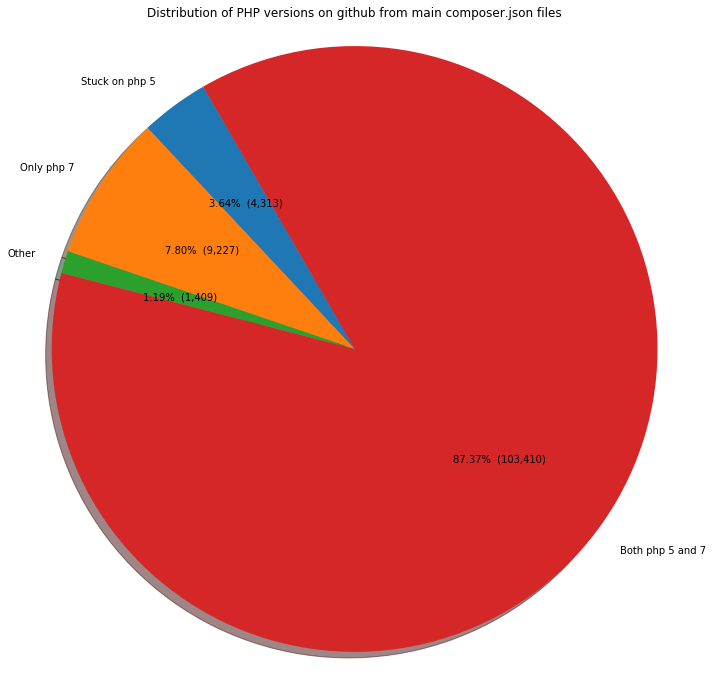

In [214]:
labels = 'Stuck on php 5', 'Only php 7', 'Other', 'Both php 5 and 7'
sizes = [stuck_on_5, only_7, final_all - stuck_on_5 - only_7 - both_5_and_7, both_5_and_7]
explode = (0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=120)
ax1.axis('equal') 
plt.title("Distribution of PHP versions on github from main composer.json files")
plt.figure(figsize=(10,10))
fig1.savefig("data/php-github-versions/5vs7.png")
plt.show() 


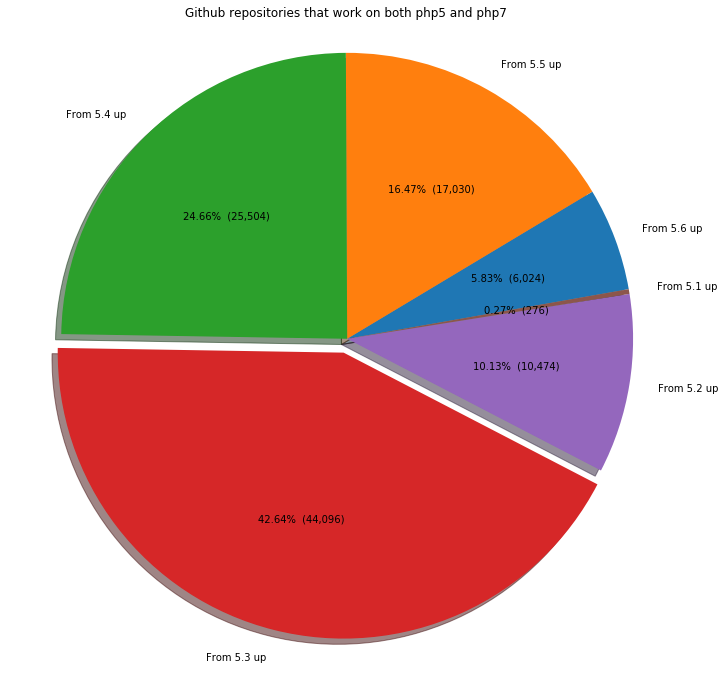

In [197]:
labels = 'From 5.6 up', 'From 5.5 up', 'From 5.4 up', 'From 5.3 up', 'From 5.2 up', 'From 5.1 up'
sizes = [final_from_5_6_to_7_optimistic, 
         final_from_5_5_to_7_optimistic,
         final_from_5_4_to_7_optimistic,
         final_from_5_3_to_7_optimistic,
         final_from_5_2_to_7_optimistic,
         final_from_5_1_to_7_optimistic]
explode = (0, 0, 0, 0.05, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=10)
ax1.axis('equal') 
plt.title("Github repositories that work on both php5 and php7")
plt.figure(figsize=(10,10))
fig1.savefig("data/php-github-versions/both.png")
plt.show() 


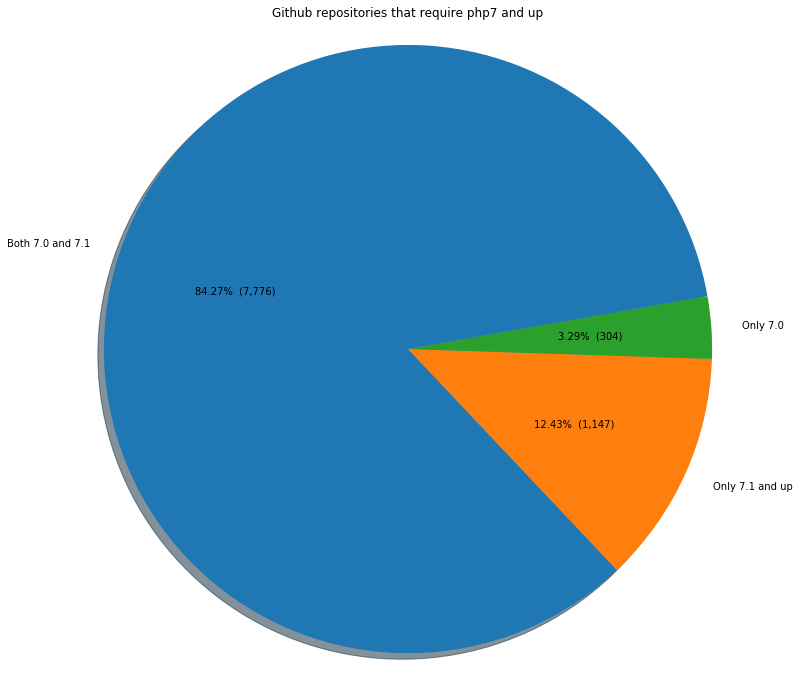

In [217]:
labels = 'Both 7.0 and 7.1', 'Only 7.1 and up', 'Only 7.0'
sizes = [final_both_7_0_and_7_1, 
         final_only_7_1,
         final_stuck_on_7_0]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=10)
ax1.axis('equal') 
plt.title("Github repositories that require php7 and up")
plt.figure(figsize=(10,10))
fig1.savefig("data/php-github-versions/php7.png")
plt.show() 


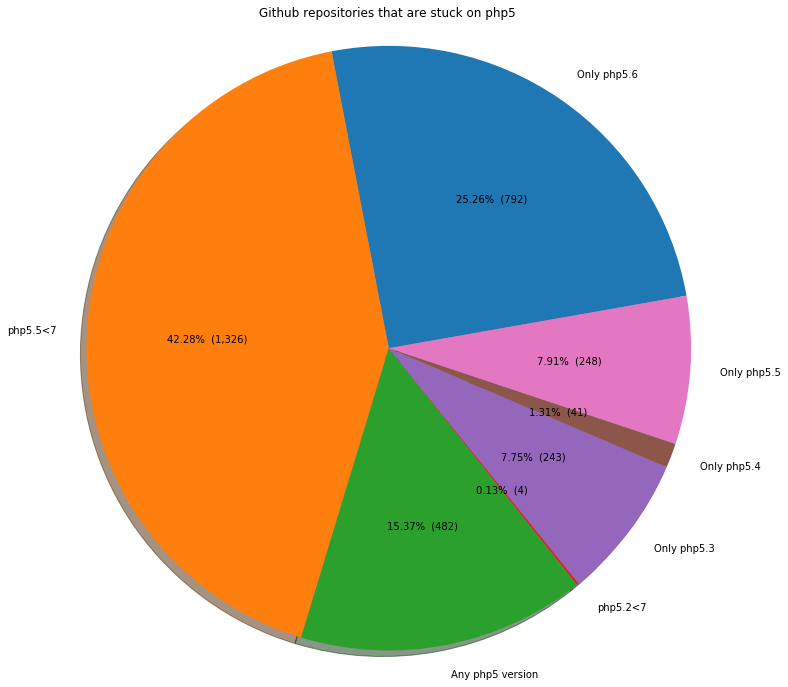

In [218]:
labels = 'Only php5.6', 'php5.5<7', 'Any php5 version', 'php5.2<7', 'Only php5.3', 'Only php5.4', 'Only php5.5'
sizes = [final_stuck_on_5_6,
        final_stuck_on_5_from_5_5,
        final_any_5_version,
        final_stuck_on_5_from_5_2,
        final_stuck_on_5_3,
        final_stuck_on_5_4,
        final_stuck_on_5_5]
explode = (0, 0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=10)
ax1.axis('equal') 
plt.title("Github repositories that are stuck on php5")
plt.figure(figsize=(10,10))
fig1.savefig("data/php-github-versions/php5.png")
plt.show() 
